<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/lab/lab3/Laborator_3-Skel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresie Liniară
==============


* Tudor Berariu, Andrei Nica 2018

* Alexandru Sorici 2020

## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie liniară**, precum și a noțiunilor de _extragere de atribute (features)_ _complexitate a modelului_ și _regularizare_.

## 2. Problema de rezolvat

Problema de rezolvat în acest laborator este una de învățare supervizată, mai concret, de **regresie**. 

Fiind date eșantionări de puncte (samples) **(X, t)**, generate de o funcție necunoscută, se dorește construirea unui **model liniar** care să poată _potrivi_ setul de date **X** (să aproximeze funcția) și care să poată fi utilizat pentru a _evalua/prezice_ valori noi.

Vom explora trei aspecte ale problemei de **regresie liniara**:
* Regresie liniara simplă (potrivirea unei drepte)
* Regresie liniară folosind **extragere de atribute** (eng. feature extraction)
* **Regularizare**, **analiza complexității modelului de regresie** și **influența numărului de date de antrenare**

## 3. Regresie liniară simplă

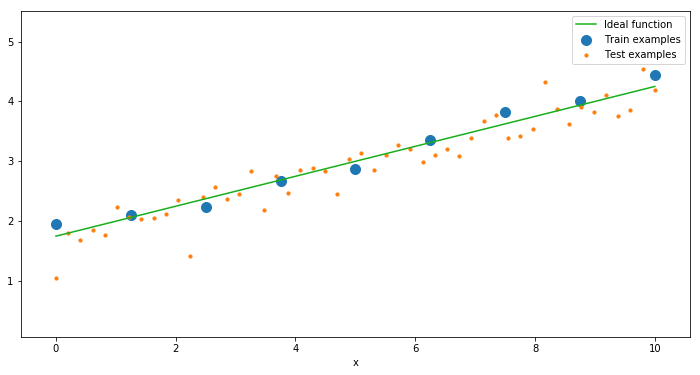

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N puncte de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$).
Pentru fiecare ${\bf x}^{(n)} \in X$ exista un $t^{(n)}$ reprezentand valoarea unei functii $f$ (necunoscute noua) in punctul ${\bf x}^{(n)}$, i.e. $t^{(n)} = f({\bf x}^{(n)})$.

Un model de regresie liniara simpla care doreste sa aproximeze functia $f$ este definit ca $${\bf y} = {\bf X} {\bf w} + b$$ unde ${\bf w}$ este un vector D-dimensional de ponderi, iar $b$ este termenul de bias.

In regresia liniara simpla se cauta solutia de **forma inchisa**:
$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf x^{(n)}} {\bf w} - t^{(n)}\right)^2$$
$${\bf w}^* = \left({\bf X}^\intercal {\bf X}\right)^{-1} {\bf X}^\intercal {\bf t} = {\bf X}^{\dagger} {\bf t}$$

unde ${\bf X^{\dagger}}$ este _pseudo inversa_ matricii ${\bf X}$.


## 4. Regresie liniara cu extragere de atribute

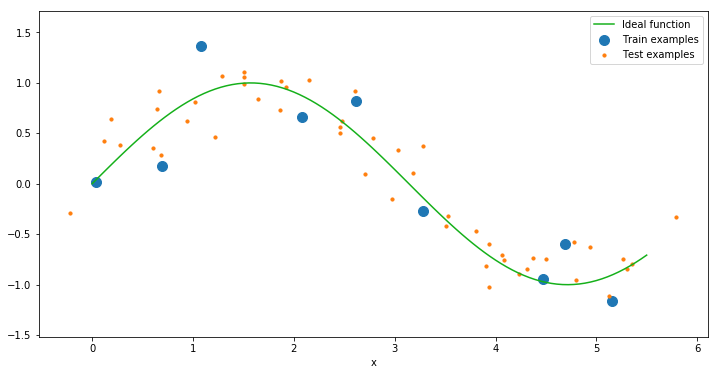

In unele cazuri, functia $f$ din care provine setul de date (**X, t**) nu este unul care sa poata fi aproximat printr-o simpla combinatie liniara a **spatiului de intrare** (i.e. a domeniului din care provine **X**).

Intr-un astfel de caz, spatiul de intrare poate fi _transformat_ intr-unul mai complex, avand o capabilitate de modelare mai bogata.
Acest lucru se face prin intermediul unor _functii de transformare_ $\phi$ care duc ${\bf x^{(n)}} \rightarrow \phi({\bf x^{(n)}})$.

Un exemplu il reprezinta functiile de **transformari polinomiale** de tipul:
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$
unde $M$ este gradul polinomului cu care se face transformarea.

Solutia de regresie liniara (in forma inchisa) devine atunci:


$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2$$


$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi}\right)^{-1} {\bf \Phi}^\intercal {\bf t} = {\bf \Phi}^{\dagger} {\bf t}$$

## 5. Regresie liniara cu regularizare

O solutie de optimizare in sensul celor mai mici patrate (ordinary least squares - OLS), cauta sa gaseasca _cea mai buna potrivire_ (best fit) pentru punctele din setul de date dat la antrenare.

Acest lucru duce la construirea unui estimator **unbiased**, i.e. modelul nu va prefera _prioritizarea_ unui feature (i.e. un anume $\phi^{(n)}$) in detrimentul altuia.
In plus, daca _modelul este complex,_  iar _datele de antrenare sunt putine,_ optimizarea OLS poate duce la fenomenul de **overfit** (i.e. modelul este prea specific pe datele de antrenare, dar nu are o evaluare buna pe date de test).

Un proces de **regularizare** are ca scop impunerea unei restrictii asupra parametrilor ${\bf w}$, astfel incat modelul sa poata da un bias acelor feature-uri care sunt mai relevante (importante) in construirea estimatorului.

Solutia de **regresie liniara cu regularizare L2** se scrie astfel:

$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 + \alpha {\bf w^T}{\bf w} \equiv \underset{{\bf w: w^Tw \leq t(\alpha)}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 $$ 

Solutia de forma inchisa pentru regresia liniara cu regularizare L2 (eng. Ridge Regression) este data prin:
$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi} + \alpha I \right)^{-1} {\bf \Phi}^\intercal {\bf t}$$


### Dependente

In [3]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 292 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 33.0 MB 16.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 6. Generare seturi de date

In [5]:
DATASET_TYPE = "linear" # linear, polinomial, sin

In [6]:
def generate_examples(dataset_type = "linear", N = 9, noise = 0.2, dist_noise = 0.2):
    if dataset_type == "linear":
        X = np.linspace(0, 10, N)
        t = X * 0.25 + 1.75 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "polinomial":
        X = np.linspace(-1.5, 5.5, N)
        X += np.random.randn(N) * dist_noise
        t = .25*X * X - X + 1 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "sin":
        X = np.linspace(0, 1.75 * np.pi, N)
        X += np.random.randn(N) * dist_noise
        t = np.sin(X) + np.random.randn(N) * noise
        return X, t
    
    else:
        raise ValueError("Unknown dataset type: " + dataset_type)

## 6. Cerinta 1: Implementare model de regresie liniara

### 6.1 Cerinta 1.1: Implementarea modelului general de regresie liniara [3 pct]

In [7]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w
        self.w = np.linalg.pinv(X) @ t
        # end 
        
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        # TODO codul vostru aici: calculati valoarea prezisa de modelul vostru
        y = X @ self.w
        # end codul vostru aici
        
        if return_std:
            # TODO codul vostru aici: intoarceti un vector de aceeasi dimensiune cu y, care 
            # are pe fiecare valoare egala cu deviatia standard modelului antrenat (i.e. sqrt(var))
            y_std = np.sqrt(self.var)
            return y, y_std
        return y

### 6.2 Cerinta 1.2 Implementarea functiei de transformare polinomiala [1 pct]
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [14]:
def extract_polynomial_features(X, M):
    phi = X
    # TODO codul vostru aici: intoarceti valorile phi_n astfel incat pentru fiecare 
    # intrare x phi_n = [1, x, x^2, ..., x^M]
    return np.array([x ** np.arange(M + 1) for x in phi])
    # end
    
    return phi

### 6.3 Cerinta 1.3 Potrivirea unei drepte prin regresie liniara simpla [1 pct]

In [11]:
N_train = 10
N_test = 10
noise = 0.22

X_train, t_train = generate_examples(dataset_type="linear", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="linear", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="linear", N=N_test, noise=0.)


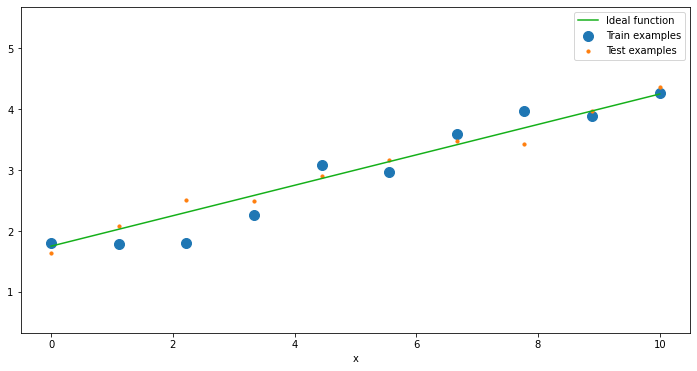

In [12]:
plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, t_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, t_train, s=100, label="Train examples")
plt.scatter(X_test, t_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

In [16]:
# TODO codul vostru aici:

# creati un model liniar
model = LinearRegression()

# Folositi functia extract_polynomial_features pentru a introduce termenul de bias in matricile X_train si X_test
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

# antrenati modelul vostru
model.fit(X_train_feat, t_train)

# obtineti predictia pe setul de antrenare si pe setul de test
y_train = model.predict(X_train_feat) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

In [17]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

In [18]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

Train error: 0.0485627977940685
Test  error: 0.031231651837041657


#### Vizualizarea modelului invatat

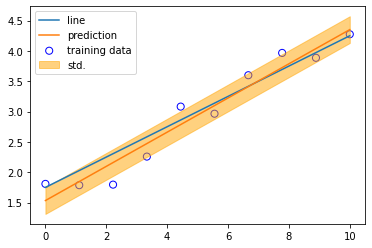

In [19]:
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 7. Cerinta 2.1: Implementare regresie liniara cu regularizare (Ridge Regression) [3 pct]

In [27]:
class RidgeRegression(LinearRegression):
    """
    Modelul de regresie liniara, folosind regularizare L2
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        super(RidgeRegression, self).__init__()
        self.alpha = alpha

        
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting), tinand cont si de regularizare
        Parameterii
        ----------
         X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w, conform formulei de la punctul 5 
        X_t = np.transpose(X)
        self.w = np.linalg.inv(X_t @ X + self.alpha * np.identity(X.shape[1])) @ X_t @ t
        # end
        
        self.var = np.mean(np.square(X @ self.w - t))

## 7.1 Cerinta 2.2: Potrivirea functiei sin(x) cu feature-uri polinomiale [1 pct]

**Analizati** modelele de regresie liniara _cu_ si _fara_  regularizare. Ce concluzii se deduc din graficele de vizualizare si valorile functiei de eroare (MSE - mean squared error)

In [77]:
N_train = 15 #@param {type: "slider", default: 10, min: 10, max: 100}
N_test = 20
noise = 0.22

X_train, t_train = generate_examples(dataset_type="sin", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="sin", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="sin", N=100, noise=.0, dist_noise=.0)

### Folosirea unui model de regresie liniara, _fara_ regularizare

In [78]:
M = 8 #@param {type: "slider", default: 8, min: 1, max: 15}
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

#### Vizualizarea modelului invatat

Train error: 0.0073773735222283756
Test  error: 0.07775005504957147


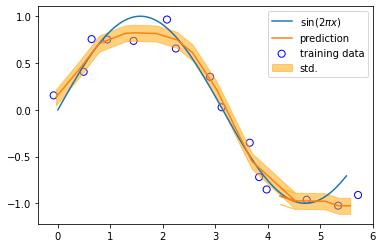

In [79]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

### Folosirea unui model de regresie liniara, _cu_ regularizare

In [80]:
model = RidgeRegression(alpha=5)
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

Train error: 0.02417015445651474
Test  error: 0.08820867186285353


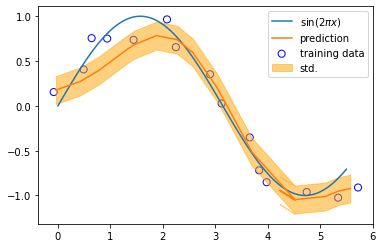

In [81]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 8. Cerinta 3: Vizualizarea curbelor de antrenare si testare [1 pct]

**Analizati** curbele de _antrenare_ si _testare_ pentru modele de regresie liniara _cu_ si _fara_ regularizare, de **complexitate** diferita (M diferit).

Discutati graficele rezultate:
* care este regimul de underfitting?
* care este regimul de overfitting?
* ce se intampla daca modificati numarul de date de antrenare (N_train) de la punctul 7.1? 

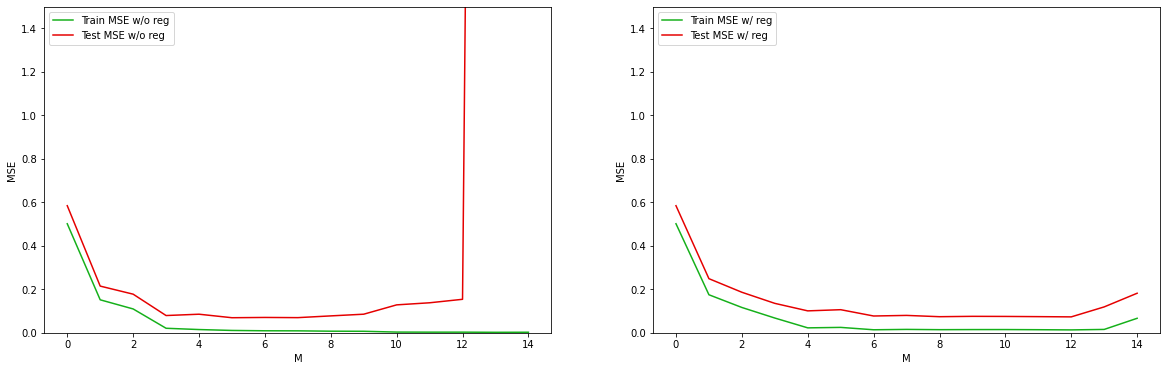

In [82]:
train_lin_mse = []
test_lin_mse = []

train_ridge_mse = []
test_ridge_mse = []

for M in range(15):
    X_train_feat = extract_polynomial_features(X_train, M)
    X_test_feat = extract_polynomial_features(X_test, M)
    
    model_linear = LinearRegression()
    model_ridge = RidgeRegression(alpha=1.75)
    
    model_linear.fit(X_train_feat, t_train)
    model_ridge.fit(X_train_feat, t_train)
    
    y_train_lin = model_linear.predict(X_train_feat)
    y_test_lin = model_linear.predict(X_test_feat)
    
    y_train_ridge = model_ridge.predict(X_train_feat)
    y_test_ridge = model_ridge.predict(X_test_feat)
    
    train_lin_mse.append(mean_squared_error(y_train_lin, t_train))
    test_lin_mse.append(mean_squared_error(y_test_lin, t_test))
    
    train_ridge_mse.append(mean_squared_error(y_train_ridge, t_train))
    test_ridge_mse.append(mean_squared_error(y_test_ridge, t_test))

plt.figure(figsize=(20,6))
# plot training/test curves depending on model size for LinearRegression
plt.subplot(1, 2, 1)
plt.plot(range(M+1), train_lin_mse, sns.xkcd_rgb["green"], label="Train MSE w/o reg")
plt.plot(range(M+1), test_lin_mse, sns.xkcd_rgb["red"], label="Test MSE w/o reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

# plot training/test curves depending on model size for RidgeRegression
plt.subplot(1, 2, 2)
plt.plot(range(M+1), train_ridge_mse, sns.xkcd_rgb["green"], label="Train MSE w/ reg")
plt.plot(range(M+1), test_ridge_mse, sns.xkcd_rgb["red"], label="Test MSE w/ reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

plt.show()

### 1)

In figura din stanga se observa regimul de **overfitting** deoarece in training eroare este 0 de la un numar de sample-uri incolo.

### 2)

In figura din dreapta se observa cum eroare din timpul training-ului nu ajunge niciodata pe 0, iar pe test set are o marja de eroare mai mare. Adica are un numar mai mare de sample-uri pentru care eroarea nu tinde la infinit. Aceasta tindere la infinit a erorii sugereaza un posibil **underfitting**, adica avem nevoie de un spatiu de dimensiune mai mare pentru aproximarea datelor

### 3)

Prin scaderea numarului de puncte din *N_train*, avem overfitting.
Prin cresterea numarului de puncte din *N_train*, avem underfitting daca nu folosim regularizare. Daca folosim regularizare, ne apropiem de un scenariu ideal.